In [87]:
import pandas as pd
import os, glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/Users/tong/Documents/99_temp/Research/STEP/02_Station_result_csv'

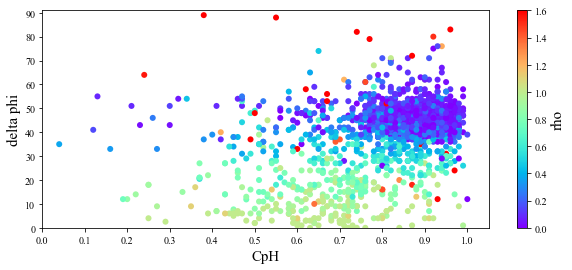

In [97]:
plt.figure(figsize=(10,4))
plt.rc('font',family='Times New Roman')
for csvpath in glob.glob(f'{path}/*/*csv'):
    sta  = csvpath.rsplit('.')[1].rsplit('_')[0]
    if sta not in ['DGRL', 'MAKU','CMCY']:
        df = pd.read_csv(csvpath)
        df = df[df['Pick']==True]
        cph = df['CpH']
        RCphi = df['RCPhi']
        SCPhi = df['SCPhi']
        RCdt = df['RCdt']
        SCdt = df['SCdt']    
        deltaphi = abs(RCphi-SCPhi)
        rho  = RCdt/SCdt
        phi_list = []
        for ii in deltaphi:
            if ii >90:
                ii = 180-ii
            else: 
                pass
            phi_list.append(ii)

        plt.scatter(cph,phi_list,c=rho, marker='o', linewidths=0.01, cmap=plt.cm.rainbow,vmin=0,vmax=1.6)
cb = plt.colorbar()
cb.set_label('rho', fontsize=15)
plt.xlim(0,1.05)
plt.ylim(0,91)
plt.xlabel('CpH',fontsize=15)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,91,10))
plt.ylabel('delta phi', fontsize=15)
plt.savefig('PCA_delta.png',dpi=150)
plt.savefig('PCA_delta.pdf')

In [29]:
csvpath.rsplit('.')[1].rsplit('_')[0]

'MAKU'

In [83]:
cb.__dir__()

['mappable',
 'ax',
 'alpha',
 'cmap',
 'norm',
 'values',
 'boundaries',
 'extend',
 '_inside',
 'spacing',
 'orientation',
 'drawedges',
 'filled',
 'extendfrac',
 'extendrect',
 'solids',
 'solids_patches',
 'lines',
 'outline',
 '_patch',
 'dividers',
 'locator',
 'minorlocator',
 'formatter',
 '_Colorbar__scale',
 'ticklocation',
 'stale',
 '_boundaries',
 '_values',
 'vmin',
 'vmax',
 '_y',
 '_interactive_funcs',
 '__module__',
 '__doc__',
 'n_rasterize',
 '__init__',
 '_cbar_cla',
 'patch',
 'update_normal',
 'draw_all',
 '_add_solids',
 '_add_solids_patches',
 '_do_extends',
 'add_lines',
 'update_ticks',
 '_get_ticker_locator_formatter',
 'set_ticks',
 'get_ticks',
 'set_ticklabels',
 'minorticks_on',
 'minorticks_off',
 'set_label',
 'set_alpha',
 '_set_scale',
 'remove',
 '_ticker',
 '_process_values',
 '_mesh',
 '_forward_boundaries',
 '_inverse_boundaries',
 '_reset_locator_formatter_scale',
 '_locate',
 '_uniform_y',
 '_proportional_y',
 '_get_extension_lengths',
 '_exten